Exemplo Visual: Regularização L1 (Lasso) e L2 (Ridge)
Imagine que estamos tentando prever um valor (y) com base em duas features (x
1
​
  e x
2
​
 ). Queremos ver como L1 e L2 mudam a importância que o modelo dá a x
1
​
  e x
2
​
 .

A ideia principal:

L2 (Ridge): Tende a encolher os coeficientes de forma proporcional, mantendo todos eles, mas tornando-os menores.
L1 (Lasso): Tende a encolher alguns coeficientes a zero, realizando seleção de features (eliminando as menos importantes).

Código: L1 e L2 Regularization em Ação

Preparando a Dieta do Adivinhador de Peso de Cachorros...

PASSO 1: Temos as dicas (tamanho, pelo, cor da coleira) e os pesos reais de 50 cachorros.
- A 'Cor da Coleira' é uma dica inútil para o peso real.
---------------------------------------------------

PASSO 2: Nosso Adivinhador tenta estimar o peso SEM NENHUMA DIETA (Regressão Linear Pura).
   -> As 'importâncias' (pesos) que ele deu para cada dica são:
      - Importância do 'Tamanho': 0.48
      - Importância do 'Pelo': 1.95
      - Importância da 'Cor da Coleira': 0.01
   (Note que ele deu alguma importância para a 'Cor da Coleira', que é inútil! Isso é 'exagero'.)
---------------------------------------------------

PASSO 3: Nosso Adivinhador agora faz a DIETA L2 (Ridge Regularization).
   -> Essa dieta pede para ele ser um pouco mais moderado em TODAS as dicas.
   -> As 'importâncias' (pesos) que ele deu com a dieta L2 são:
      - Importância do 'Tamanho': 0.48
      - Importância do 'Pelo': 1.72
      - Importância da 'Co

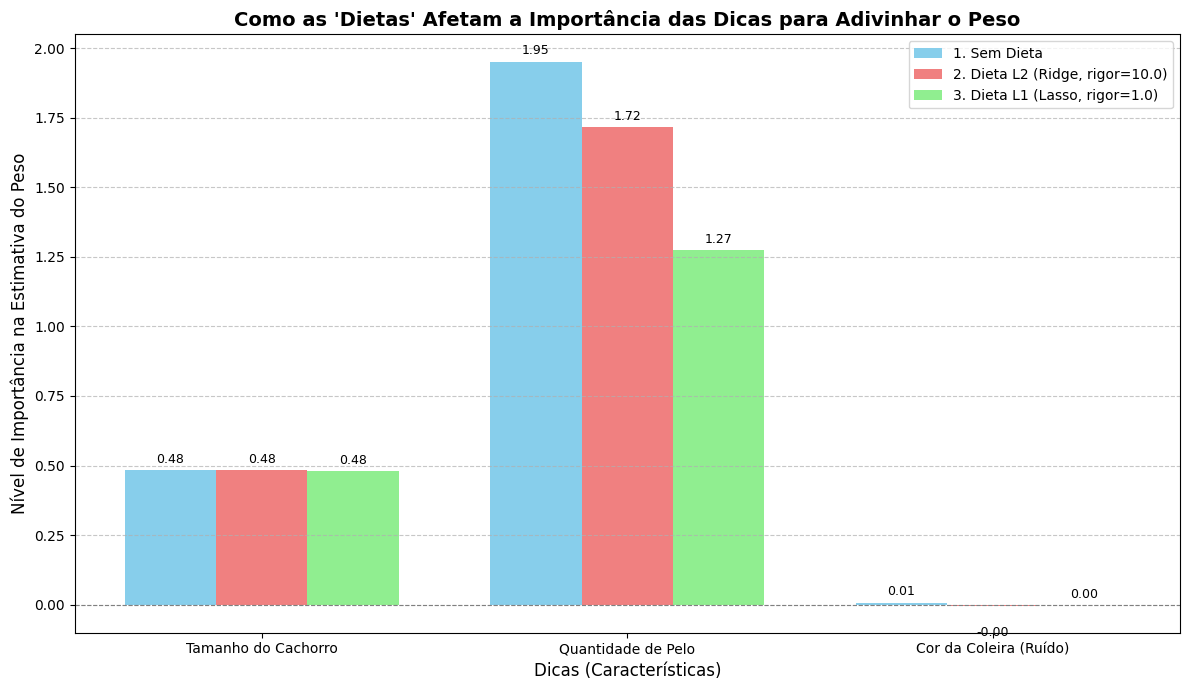


--- RESUMO FINAL ---
Olhe o gráfico com atenção:
- O Adivinhador **Sem Dieta (Azul)** usou um pouco de TODAS as dicas, inclusive a inútil 'Cor da Coleira'.
- O Adivinhador com **Dieta L2 (Ridge - Vermelho)** foi mais moderado, diminuindo a importância de todas as dicas, mas ainda usou a 'Cor da Coleira' um pouquinho.
- O Adivinhador com **Dieta L1 (Lasso - Verde)** foi o mais esperto! Ele **ZEROU a importância da 'Cor da Coleira'**, percebendo que era inútil. Isso significa que ele a IGNOROU completamente na sua estimativa!

Essas 'dietas' ajudam o adivinhador (modelo) a ser mais inteligente, não dando importância a informações desnecessárias e focando no que realmente importa para dar uma boa estimativa.
Assim, ele erra menos com cachorros novos e você entende melhor quais dicas são realmente valiosas!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge

print("Preparando a Dieta do Adivinhador de Peso de Cachorros...\n")

# --- PASSO 1: Criar Dicas e Pesos de Cachorros ---
np.random.seed(42)
num_caes = 50 # Número de cachorros observados

# Dicas (características):
# Tamanho do cachorro (cm) - muito importante!
dica_tamanho = np.random.rand(num_caes, 1) * 40 + 20 # entre 20 e 60 cm

# Quantidade de pelo (escala de 1 a 5) - importante, mas menos
dica_pelo = np.random.rand(num_caes, 1) * 4 + 1 # entre 1 e 5

# Cor da coleira (número aleatório) - NÃO IMPORTA (RUÍDO)!
dica_cor_coleira = np.random.rand(num_caes, 1) * 10 # um número qualquer para a cor

# Juntamos as dicas para o nosso adivinhador
dicas_x = np.hstack([dica_tamanho, dica_pelo, dica_cor_coleira])

# O 'Peso real' do cachorro é gerado assim:
# Peso = (0.5 * Tamanho) + (2 * Pelo) + (0.01 * Cor da Coleira) + Um pouco de variação aleatória
# Veja que 'Cor da Coleira' tem um impacto muito pequeno (0.01)
peso_y = (0.5 * dicas_x[:, 0] + 2 * dicas_x[:, 1] + 0.01 * dicas_x[:, 2] + np.random.randn(num_caes) * 1.5)

print("PASSO 1: Temos as dicas (tamanho, pelo, cor da coleira) e os pesos reais de 50 cachorros.")
print("- A 'Cor da Coleira' é uma dica inútil para o peso real.")
print("---------------------------------------------------\n")

# --- PASSO 2: O Adivinhador SEM DIETA (Regressão Linear Pura) ---
# Nosso adivinhador "come" todas as informações que vê, sem restrição.

print("PASSO 2: Nosso Adivinhador tenta estimar o peso SEM NENHUMA DIETA (Regressão Linear Pura).")
adivinhador_sem_dieta = LinearRegression()
adivinhador_sem_dieta.fit(dicas_x, peso_y)

print("   -> As 'importâncias' (pesos) que ele deu para cada dica são:")
print(f"      - Importância do 'Tamanho': {adivinhador_sem_dieta.coef_[0]:.2f}")
print(f"      - Importância do 'Pelo': {adivinhador_sem_dieta.coef_[1]:.2f}")
print(f"      - Importância da 'Cor da Coleira': {adivinhador_sem_dieta.coef_[2]:.2f}")
print("   (Note que ele deu alguma importância para a 'Cor da Coleira', que é inútil! Isso é 'exagero'.)")
print("---------------------------------------------------\n")

# --- PASSO 3: O Adivinhador com DIETA L2 (Ridge) ---
# A 'dieta' L2: "Diminua um pouco a importância de *todas* as dicas."

print("PASSO 3: Nosso Adivinhador agora faz a DIETA L2 (Ridge Regularization).")
print("   -> Essa dieta pede para ele ser um pouco mais moderado em TODAS as dicas.")
alpha_l2 = 10.0 # 'alpha' é o nível de rigor da dieta L2.
adivinhador_l2 = Ridge(alpha=alpha_l2, random_state=42)
adivinhador_l2.fit(dicas_x, peso_y)

print(f"   -> As 'importâncias' (pesos) que ele deu com a dieta L2 são:")
print(f"      - Importância do 'Tamanho': {adivinhador_l2.coef_[0]:.2f}")
print(f"      - Importância do 'Pelo': {adivinhador_l2.coef_[1]:.2f}")
print(f"      - Importância da 'Cor da Coleira': {adivinhador_l2.coef_[2]:.2f}")
print("   (Observe que todos os pesos ficaram menores, mas nenhum foi completamente zerado.)")
print("---------------------------------------------------\n")

# --- PASSO 4: O Adivinhador com DIETA L1 (Lasso) ---
# A 'dieta' L1: "Zere a importância das dicas que não servem para nada."

print("PASSO 4: Nosso Adivinhador agora faz a DIETA L1 (Lasso Regularization).")
print("   -> Essa dieta é mais inteligente: ela ZERA a importância das dicas inúteis!")
alpha_l1 = 1.0 # 'alpha' é o nível de rigor da dieta L1.
adivinhador_l1 = Lasso(alpha=alpha_l1, random_state=42)
adivinhador_l1.fit(dicas_x, peso_y)

print(f"   -> As 'importâncias' (pesos) que ele deu com a dieta L1 são:")
print(f"      - Importância do 'Tamanho': {adivinhador_l1.coef_[0]:.2f}")
print(f"      - Importância do 'Pelo': {adivinhador_l1.coef_[1]:.2f}")
print(f"      - Importância da 'Cor da Coleira': {adivinhador_l1.coef_[2]:.2f}")
print("   (Mágica! A importância da 'Cor da Coleira' virou ZERO! Ele a ignorou completamente.)")
print("---------------------------------------------------\n")

# --- PASSO 5: A Grande Comparação Visual ---
# Vamos ver lado a lado como cada dieta afetou as 'importâncias' das dicas.

print("PASSO 5: Hora de VISUALIZAR as 'receitas de importância' de cada adivinhador!")

labels = ['Tamanho do Cachorro', 'Quantidade de Pelo', 'Cor da Coleira (Ruído)']
importancias_sem_dieta = adivinhador_sem_dieta.coef_
importancias_l2 = adivinhador_l2.coef_
importancias_l1 = adivinhador_l1.coef_

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 7))

bar1 = plt.bar(x - width, importancias_sem_dieta, width, label='1. Sem Dieta', color='skyblue')
bar2 = plt.bar(x, importancias_l2, width, label=f'2. Dieta L2 (Ridge, rigor={alpha_l2})', color='lightcoral')
bar3 = plt.bar(x + width, importancias_l1, width, label=f'3. Dieta L1 (Lasso, rigor={alpha_l1})', color='lightgreen')

plt.xlabel('Dicas (Características)', fontsize=12)
plt.ylabel('Nível de Importância na Estimativa do Peso', fontsize=12)
plt.title('Como as \'Dietas\' Afetam a Importância das Dicas para Adivinhar o Peso', fontsize=14, weight='bold')
plt.xticks(x, labels, fontsize=10)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--') # Linha no zero

plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores nas barras para facilitar a leitura
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3 if height >=0 else -15),
                     textcoords="offset points",
                     ha='center', va='bottom' if height >= 0 else 'top',
                     fontsize=9)

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()

print("\n--- RESUMO FINAL ---")
print("Olhe o gráfico com atenção:")
print("- O Adivinhador **Sem Dieta (Azul)** usou um pouco de TODAS as dicas, inclusive a inútil 'Cor da Coleira'.")
print("- O Adivinhador com **Dieta L2 (Ridge - Vermelho)** foi mais moderado, diminuindo a importância de todas as dicas, mas ainda usou a 'Cor da Coleira' um pouquinho.")
print("- O Adivinhador com **Dieta L1 (Lasso - Verde)** foi o mais esperto! Ele **ZEROU a importância da 'Cor da Coleira'**, percebendo que era inútil. Isso significa que ele a IGNOROU completamente na sua estimativa!")
print("\nEssas 'dietas' ajudam o adivinhador (modelo) a ser mais inteligente, não dando importância a informações desnecessárias e focando no que realmente importa para dar uma boa estimativa.")
print("Assim, ele erra menos com cachorros novos e você entende melhor quais dicas são realmente valiosas!")